In [1]:
import pandas as pd
import numpy as np
import json
import os
from pathlib import Path

In [2]:
MEMBERS = "./members.csv"
SONG_FEAT = "./song_extra_info.csv"
SONGS = "./songs.csv"
TRAIN = "./train.csv"

In [3]:
members_df = pd.read_csv(MEMBERS)
song_feat_df = pd.read_csv(SONG_FEAT)
songs_df = pd.read_csv(SONGS)
train_df = pd.read_csv(TRAIN)

In [25]:
train_df.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [5]:
train_df.describe(include='all')

,msno,song_id,source_system_tab,source_screen_name,source_type,target
count,7377418,7377418,7352569,6962614,7355879,7.377418e+06
unique,30755,359966,8,20,12,NaN
top,MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,NaN
freq,5819,13973,3684730,3228202,2261399,NaN
mean,NaN,NaN,NaN,NaN,NaN,5.035171e-01
std,NaN,NaN,NaN,NaN,NaN,4.999877e-01
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.000000e+00


In [6]:
train_df.isna().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [7]:
train_df['source_screen_name'].unique()

array(['Explore', 'Local playlist more', nan, 'My library',
       'Online playlist more', 'Album more', 'Discover Feature',
       'Unknown', 'Discover Chart', 'Radio', 'Artist more', 'Search',
       'Others profile more', 'Search Trends', 'Discover Genre',
       'My library_Search', 'Search Home', 'Discover New',
       'Self profile more', 'Concert', 'Payment'], dtype=object)

In [8]:
train_df['source_system_tab'].unique()

array(['explore', 'my library', 'search', 'discover', nan, 'radio',
       'listen with', 'notification', 'settings'], dtype=object)

In [9]:
train_df['source_type'].unique()

array(['online-playlist', 'local-playlist', 'local-library',
       'top-hits-for-artist', 'album', nan, 'song-based-playlist',
       'radio', 'song', 'listen-with', 'artist', 'topic-article-playlist',
       'my-daily-playlist'], dtype=object)

In [10]:
train = train_df.copy()

In [11]:
train['source_type'] = train['source_type'].fillna("isnan")
train['source_screen_name'] = train['source_screen_name'].fillna("isnan")
train['source_system_tab'] = train['source_system_tab'].fillna("isnan")

In [12]:
train.isna().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='source_system_tab', ylabel='Count'>

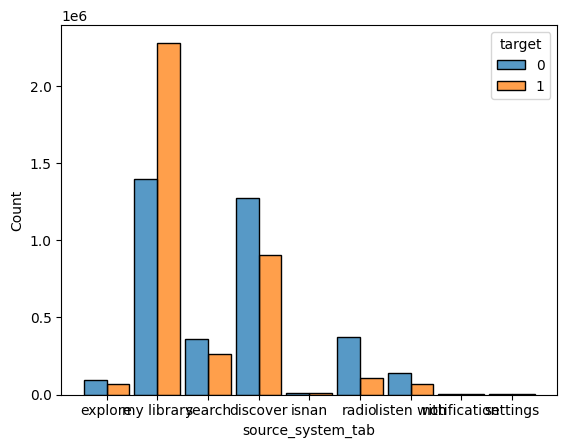

In [14]:
sns.histplot(data=train, x="source_system_tab", hue="target", multiple="dodge", shrink=.9)

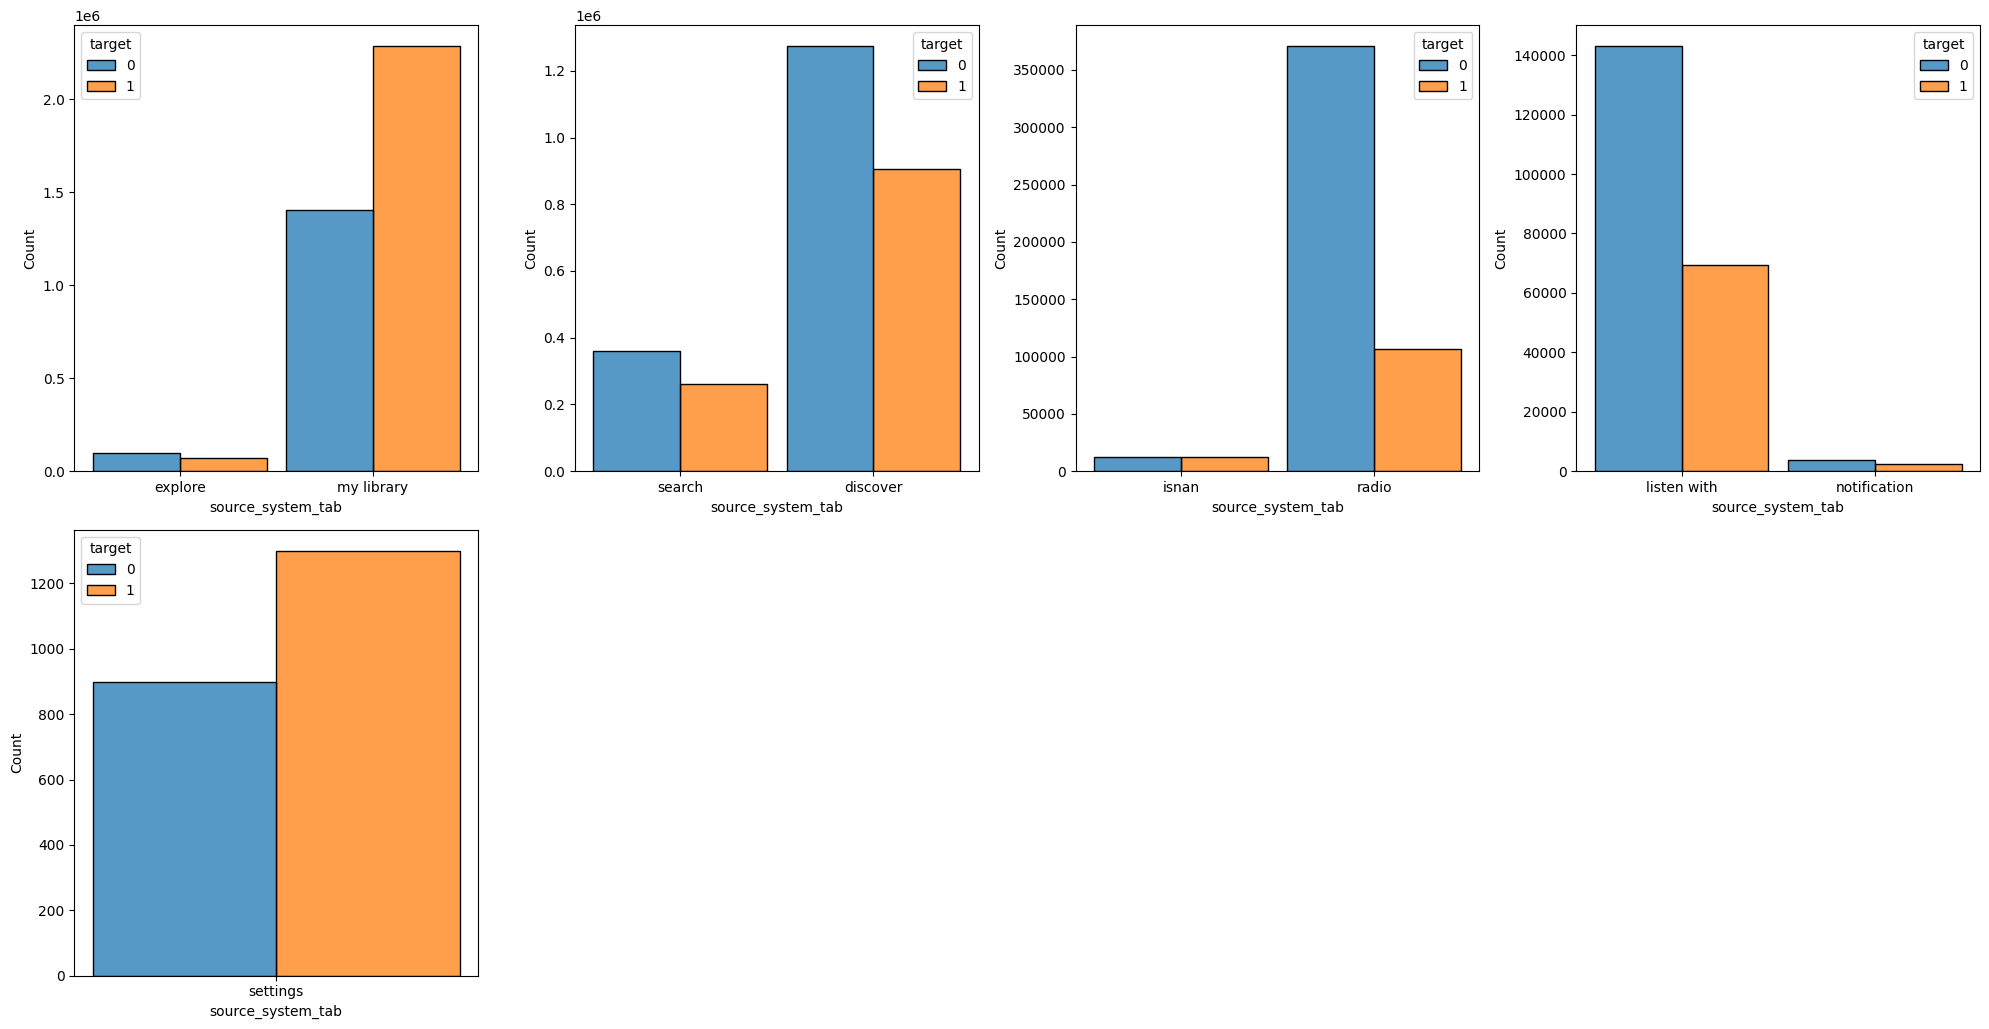

In [42]:
unique_tabs = train['source_system_tab'].unique()

# Создаем сетку подграфиков
n = len(unique_tabs)  # Количество уникальных значений
n_cols = 4  # Количество столбцов в сетке
n_rows = (n + n_cols - 1) // n_cols  # Вычисляем количество строк

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.ravel()  # Преобразуем в одномерный массив для удобства
# Построение гистограмм для каждого значения source_system_tab

for i in range(0,len(unique_tabs),2):
    sns.histplot(data=train[train['source_system_tab'].isin( unique_tabs[i:i+2])] ,x='source_system_tab',hue='target', multiple="dodge", shrink=.9, ax=axes[i//2])

# Убираем пустые подграфики, если они есть
for j in range(i//2 + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

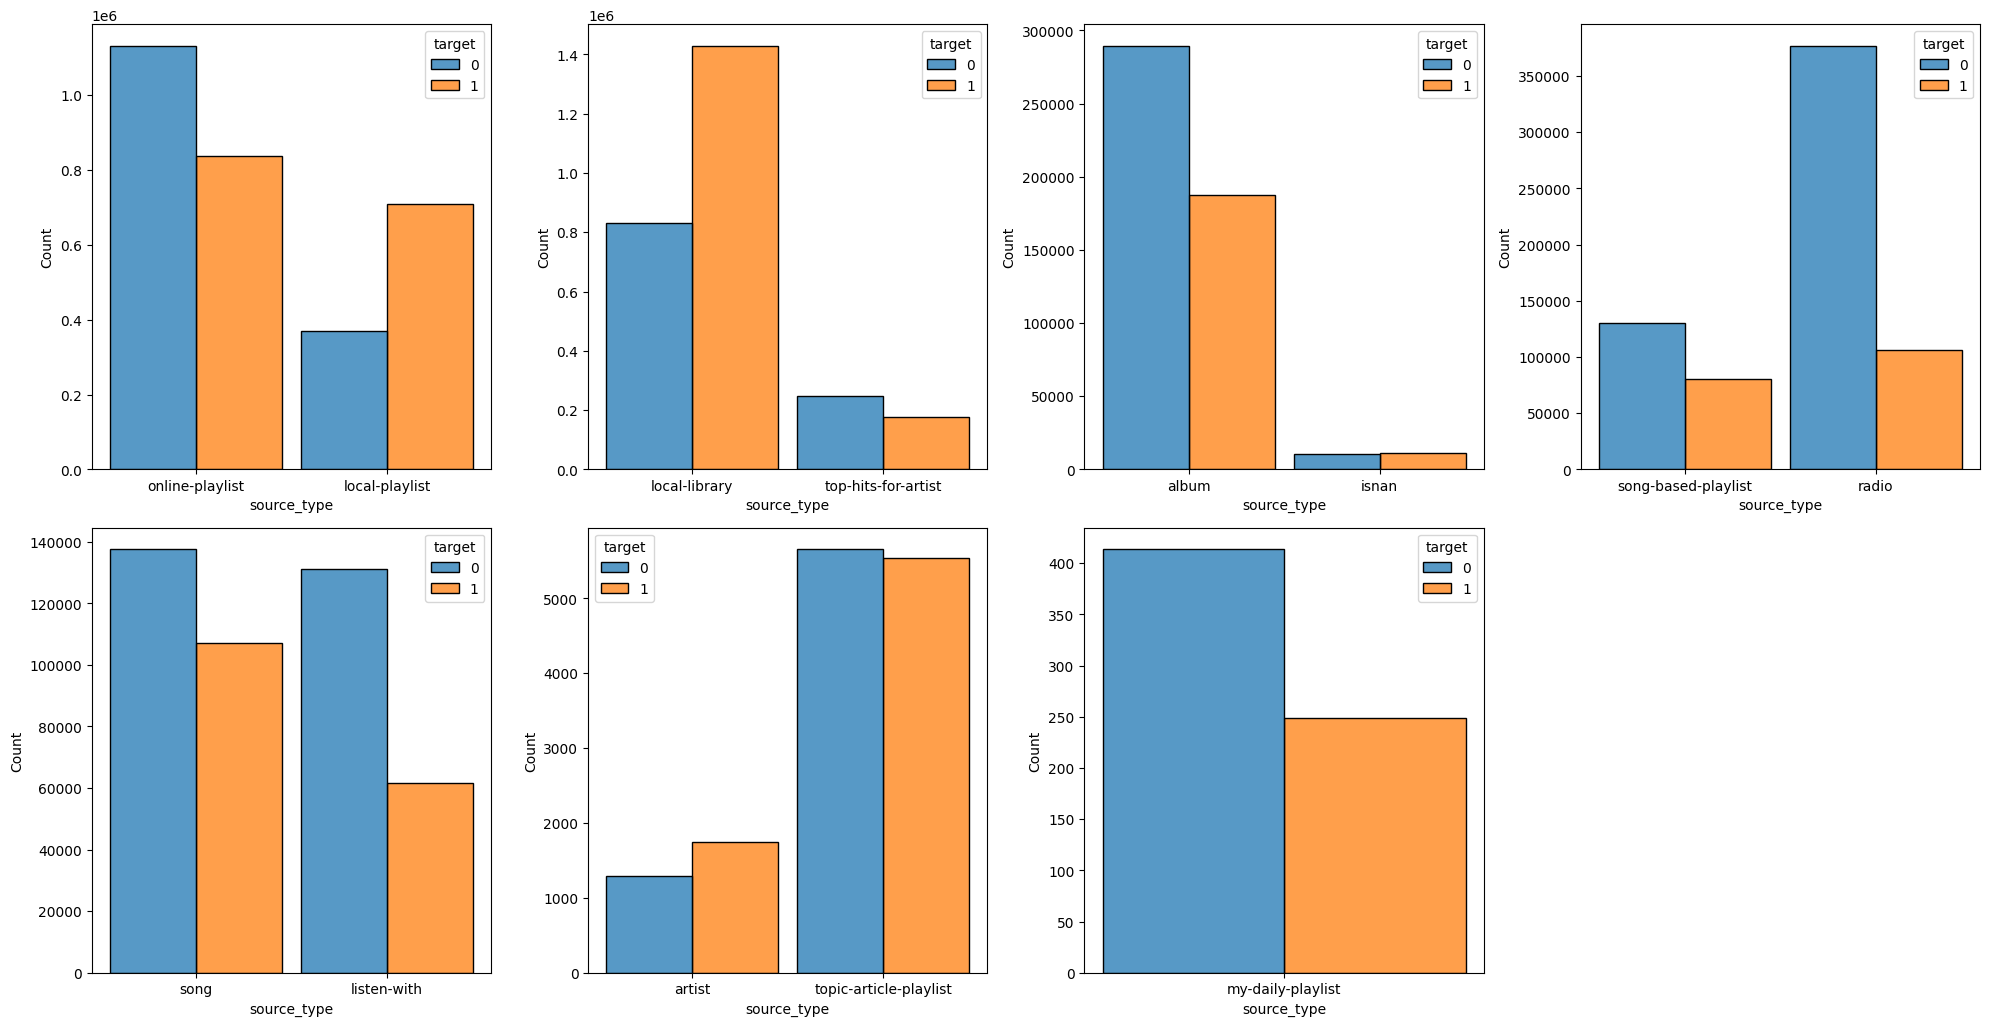

In [40]:
unique_tabs = train['source_type'].unique()

# Создаем сетку подграфиков
n = len(unique_tabs)  # Количество уникальных значений
n_cols = 4  # Количество столбцов в сетке
n_rows = (n + n_cols - 1) // n_cols  # Вычисляем количество строк

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.ravel()  # Преобразуем в одномерный массив для удобства
# Построение гистограмм для каждого значения source_type

for i in range(0,len(unique_tabs),2):
    sns.histplot(data=train[train['source_type'].isin( unique_tabs[i:i+2])] ,x='source_type',hue='target', multiple="dodge", shrink=.9, ax=axes[i//2])

# Убираем пустые подграфики, если они есть
for j in range(i//2 + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

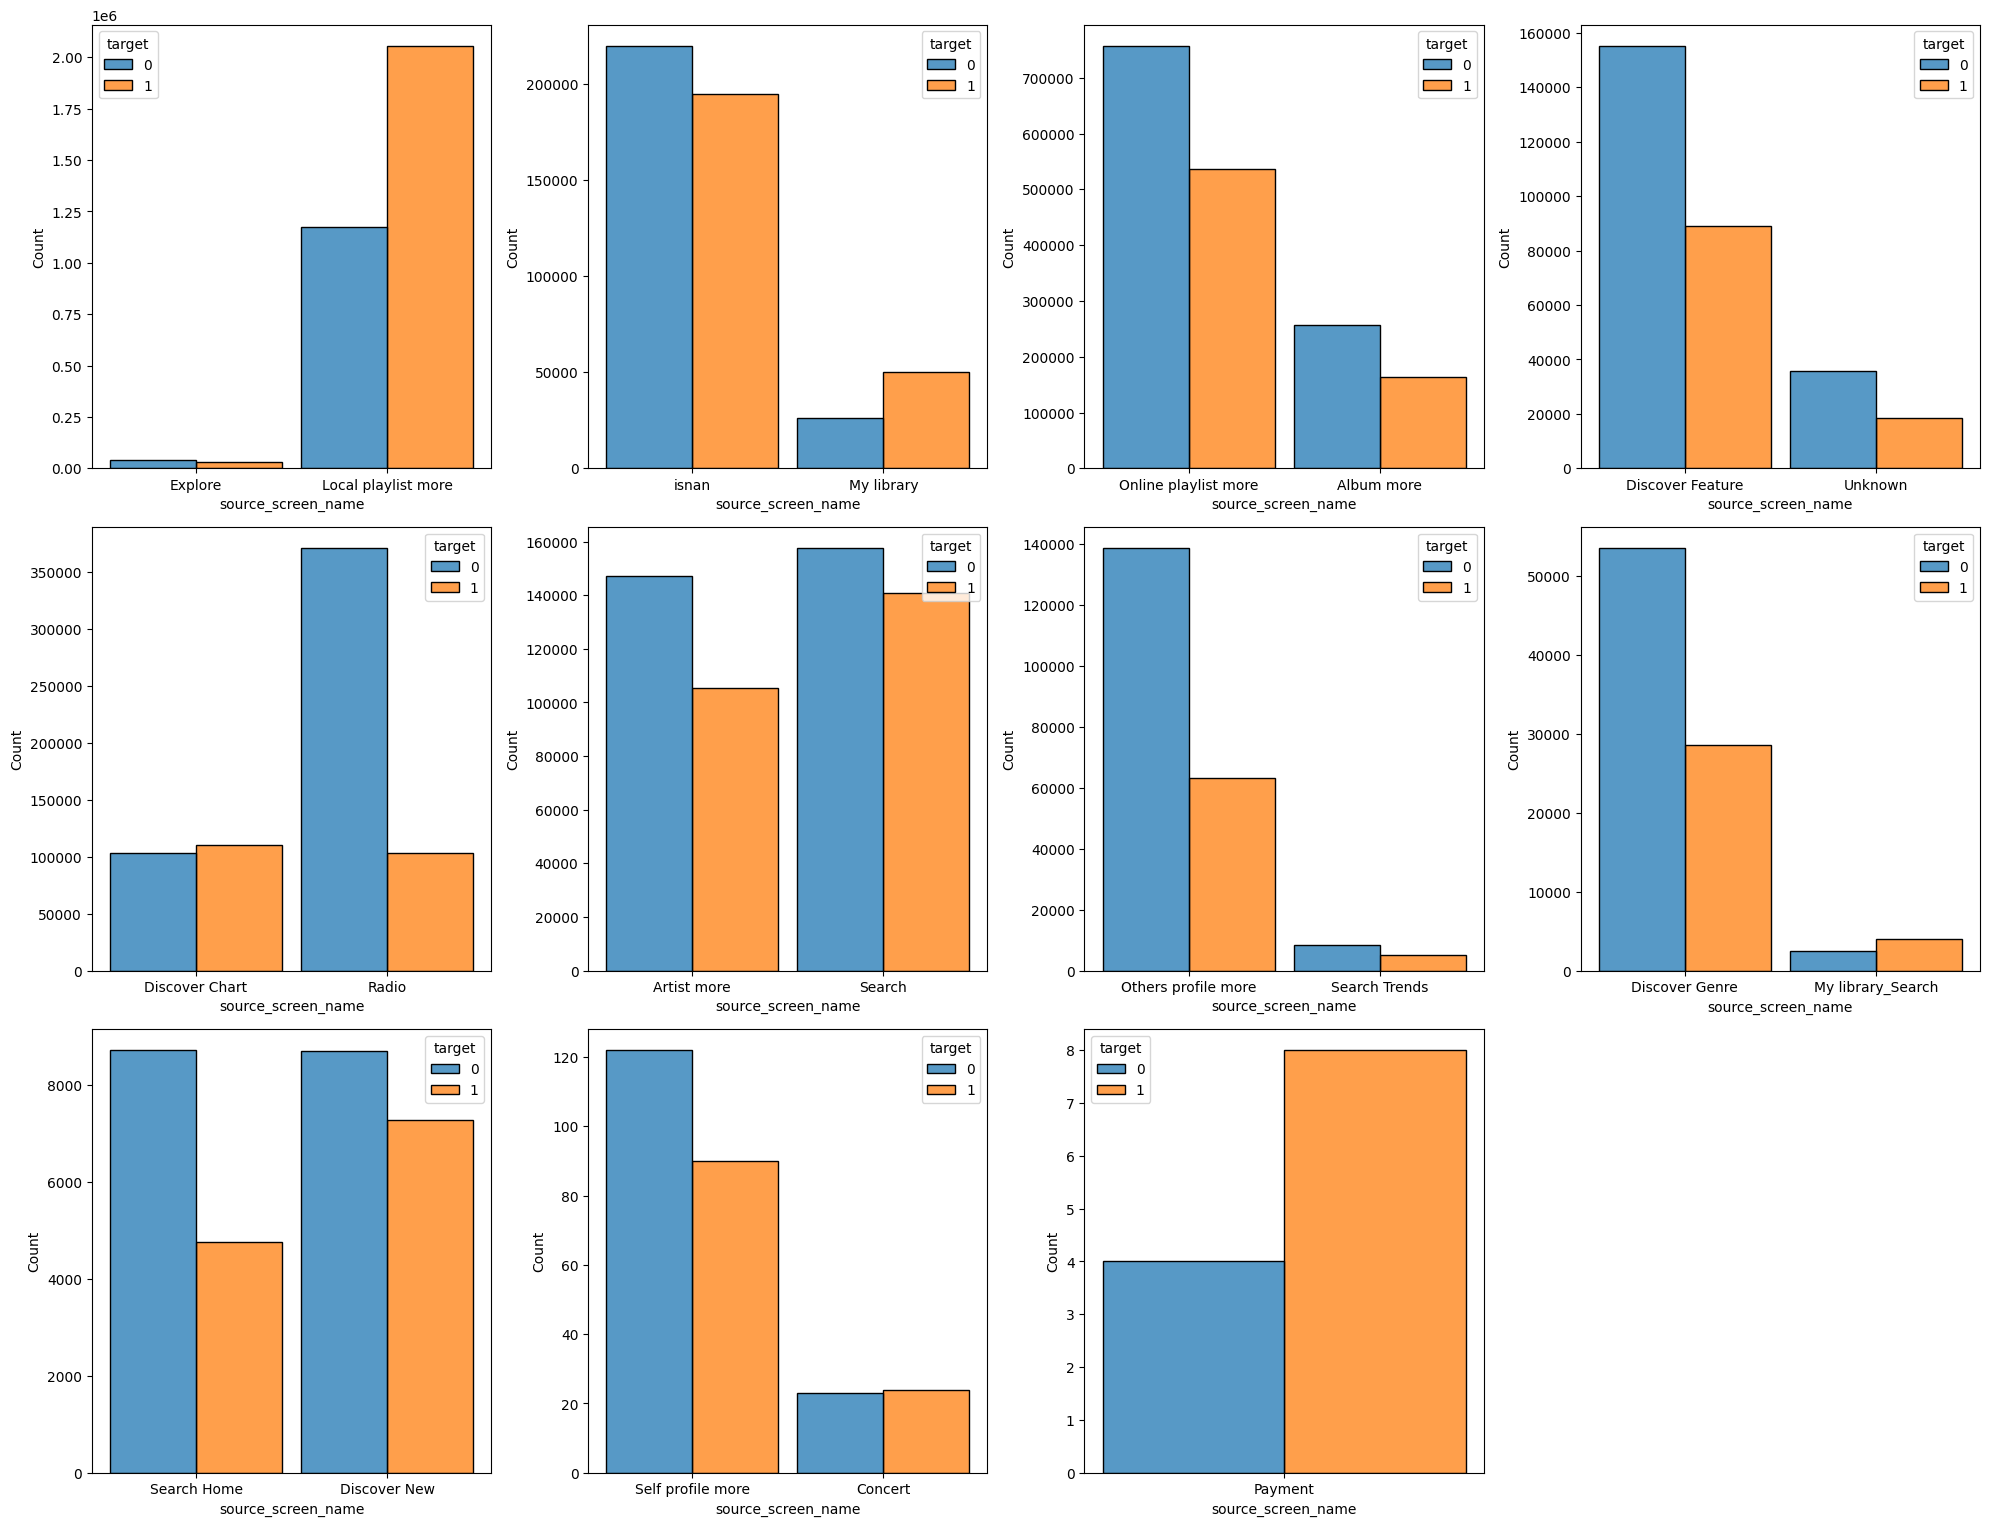

In [41]:
unique_tabs = train['source_screen_name'].unique()

# Создаем сетку подграфиков
n = len(unique_tabs)  # Количество уникальных значений
n_cols = 4  # Количество столбцов в сетке
n_rows = (n + n_cols - 1) // n_cols  # Вычисляем количество строк

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.ravel()  # Преобразуем в одномерный массив для удобства
# Построение гистограмм для каждого значения source_screen_name

for i in range(0,len(unique_tabs),2):
    sns.histplot(data=train[train['source_screen_name'].isin( unique_tabs[i:i+2])] ,x='source_screen_name',hue='target', multiple="dodge", shrink=.9, ax=axes[i//2])

# Убираем пустые подграфики, если они есть
for j in range(i//2 + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [58]:
from matplotlib.colors import Normalize

<Axes: xlabel='source_system_tab', ylabel='source_type'>

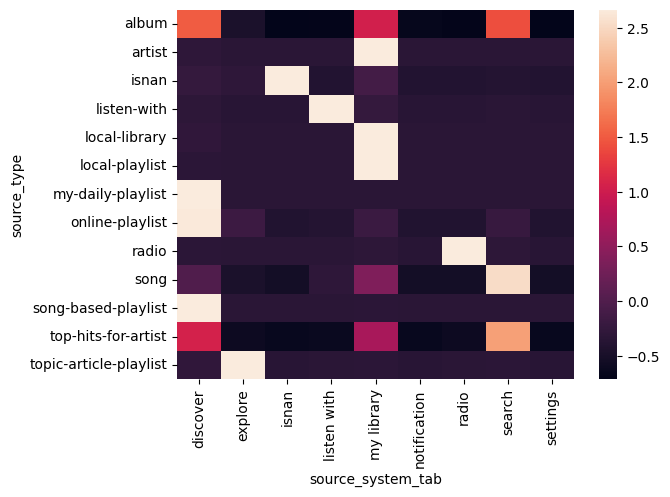

In [61]:
sns.heatmap(pd.crosstab(train['source_type'], train['source_system_tab']).apply(lambda x: (x-x.mean())/x.std(), axis = 1))

<Axes: xlabel='source_screen_name', ylabel='source_type'>

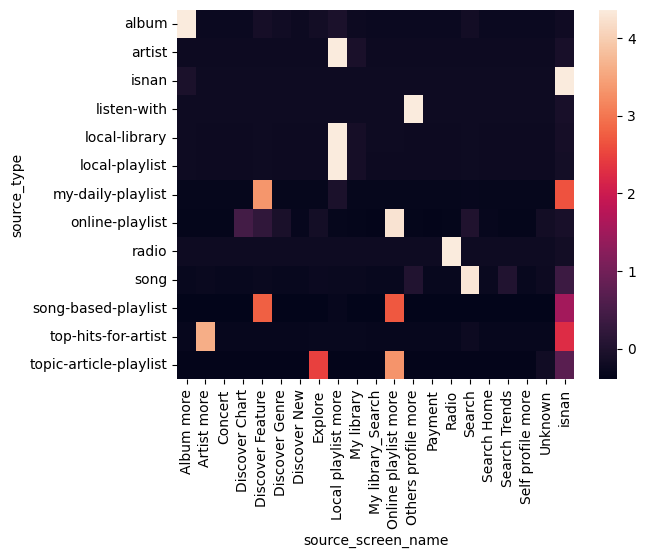

In [62]:
sns.heatmap(pd.crosstab(train['source_type'], train['source_screen_name']).apply(lambda x: (x-x.mean())/x.std(), axis = 1))

<Axes: xlabel='source_screen_name', ylabel='source_system_tab'>

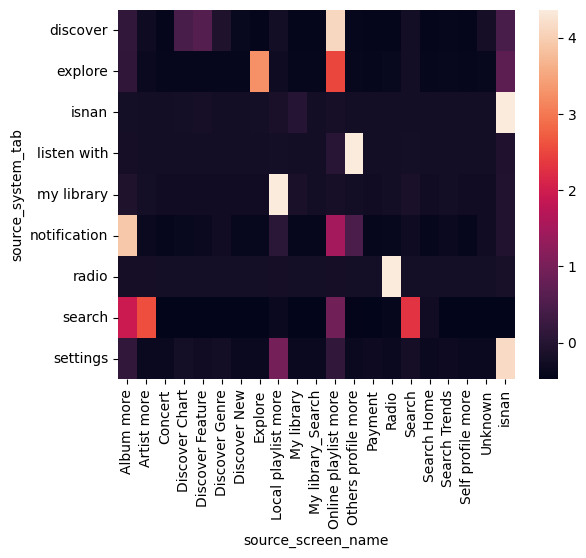

In [63]:
sns.heatmap(pd.crosstab(train['source_system_tab'], train['source_screen_name']).apply(lambda x: (x-x.mean())/x.std(), axis = 1))

In [253]:
top_songs = train.groupby(['song_id'])['target'].value_counts().reset_index( 
  name='Count').sort_values(['Count'], ascending=False).head(3000)

In [254]:
top_songs[top_songs['song_id']=='reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=']

,song_id,target,Count
443873,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,1,10885
443874,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,0,3088


In [255]:
song_feat_df[song_feat_df['song_id'].isin(top_songs['song_id'])].head(30) #Топ 30 песен по положительному таргету

,song_id,name,isrc
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
305,aZgkguQoqtkKoL7lTCAyHtxYAfg9spSdT8zqDwGiojY=,I Need You (feat. Olaf Blackwood),NLF711700198
1338,vFqdIOMZArcrRDXmvVRxEkAApbpcOrA2ngotwk5I05I=,遇見 (Encounter),TWA530355702
1339,qvJTcBfxAemsCHzAEUkDCTsZi1xHJLzhs1ZrPXBxi+s=,S.O.S,TWV911600004
1340,pkKADcjPLFdP9kX40L8dlmbLWkgUTqUB0LhurVLSTME=,我的路,TWA451500403
1341,hcUozU4hsPwPXy0MrZDTGDjwc5ofXFhGC9ez6oNotq8=,暴風雪 (Snowstorm),TWA531674102
1342,nCN5wWafpEI5N2R1yIQvRiS4rNfJQy2c6KJigvD4d0Y=,大藝術家 (The Great Artist),TWA531242313
1347,G8ItzNhbPs1g0X+IoMtYz0jaIEOqNyRJV1Ld6api4KA=,阿嬤的話,TWF850400108
2677,oqDkfkSMTwT4XrsS4MS819TYaCLoXWH0/GUHmIiWw+4=,On My Mind,GBUM71505456


In [256]:
top = top_songs.join(song_feat_df.set_index('song_id'),on='song_id',how='left')
top.head(30)

,song_id,target,Count,name,isrc
443873,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,1,10885,帥到分手,TWAG11600306
248617,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,1,10556,告白氣球,TWK971601308
143700,FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,1,9808,你，好不好？ (How Have You Been?),TWA471602002
480237,wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=,1,9411,小幸運 (A little happiness),TWD951562101
221107,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,1,9004,謝謝妳愛我 (Thanks For Your Love),TWA531657203
256651,U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=,1,8787,不該,TWK971601306
290284,YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=,1,8780,讓我留在你身邊,HKJ631603001
193411,M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=,1,8403,不為誰而作的歌 (Twilight),TWA531576502
49095,43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=,1,8112,後來的我們 (Here| After| Us),TWK231610206
168894,J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=,1,7903,Faded,NOG841549010


In [257]:
no_tw_top = top[~top['isrc'].str[0:2].isin( ['TW','HK','CN'])]

In [258]:
no_tw_top.head(30)

,song_id,target,Count,name,isrc
168894,J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=,1,7903,Faded,NOG841549010
162854,IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=,1,7224,Closer,USQX91601347
470699,v/3onppBGoSpGsWb8iaCIO8eX5+iacbH5a4ZUhT7N54=,1,6879,Alone,NOG841617010
212389,OaEbZ6TJ1NePtNUeEgWsvFLeopkSln9WQu8PBR5B3+A=,1,6187,走著走著就散了,NaN
44560,3VkD5ekIf5duJm1hmYTZlXjyl0zqV8wCzuAh3uocfCg=,1,6012,We Don't Talk Anymore,USAT21502909
3062,+LztcJcPEEwsikk6+K5udm06XJQMzR4+lzavKLUyE0k=,1,5298,Don't Let Me Down,USQX91600011
118169,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,1,5202,Let Me Love You,QMZSY1600015
501195,ys+EL8Sok4HC4i7sDY0+slDNGVZ8+uOQi6TQ6g8VSF4=,1,5012,Sugar,USUM71410466
504615,zHqZ07gn+YvF36FWzv9+y8KiCMhYhdAUS+vSIKY3UZY=,1,5001,Sing Me to Sleep,NOG841611010
180520,KZ5hwP74wRO6kRapVIprwodtNdVD2EVD3hkZmmyXFPk=,1,4888,Love Yourself,USUM71516761


In [259]:
top_songs

,song_id,target,Count
443873,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,1,10885
248617,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,1,10556
143700,FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,1,9808
480237,wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=,1,9411
221107,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,1,9004
...,...,...,...
224779,Q8npUr8DtYCppmeSF0ChJtHPusisqZ0+nmbdVHU6CmU=,1,383
306380,aPVDIQuJnwDrQjYVZxIs0tiROuwVBfLf0zREqqDR9do=,0,383
508123,zkYoYxzmRNh0k2voTIO/MqK1TKgHXaWX54bAEHUqMHI=,0,382
129115,E7+oKi6ycgS7DlwXCZM3r+7PjMgk7/dMNMGY//p3bTc=,0,382


In [260]:
def f(x):
    s = top_songs[top_songs['song_id']==x]
    if s[s['target']<1]['Count'].values and s[s['target']>0]['Count'].values:
        if s[s['target']<1]['Count'].values[0] > 0:
            return s[s['target']>0]['Count'].values[0]/s[s['target']<1]['Count'].values[0]
    return 0

In [261]:
top_songs['ratio'] = top_songs['song_id'].apply(lambda x: f(x))

C:\Users\Andrey\AppData\Local\Temp\ipykernel_1688\312152735.py:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if s[s['target']<1]['Count'].values and s[s['target']>0]['Count'].values:


In [262]:
top_songs.head(100)

,song_id,target,Count,ratio
443873,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,1,10885,3.524935
248617,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,1,10556,3.856777
143700,FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,1,9808,3.218904
480237,wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=,1,9411,2.565703
221107,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,1,9004,3.001333
...,...,...,...,...
463635,u6/Pb7X4u7KU4gXrBgGqt8RlRrNNFLn03tLAHyxRxwA=,1,3617,1.703721
456234,tB7WW8fbj7VdrPYInjSGBfslYr2DKNIeeFKQsqqMZvc=,1,3609,1.451146
315012,bTlSHgnwaBMIKHseTFHanJ3Zr4x82ybrGkexpnxDhTY=,1,3583,1.861299
271195,W+akwEPQhC1OugUaQlo0DR9xVs49UbJDZbiGvgN6ZyY=,1,3577,1.768166


In [270]:
k = train[train['song_id'].isin(top_songs['song_id'])].loc[:,['song_id','target']]

In [279]:
k.head()

,song_id,target
5,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1
6,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,1
9,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,1
11,8FGjC9W+7F8WjheGZPAwX9RH3+nWSO7DzjM6EB6naOI=,1
12,u6/Pb7X4u7KU4gXrBgGqt8RlRrNNFLn03tLAHyxRxwA=,0
...,...,...
7377399,Qy+gXpJ+XViWd3/wBKB6NMQJgiyfC2Db3eGBeo8Bq5s=,0
7377405,wev1Fi6KYkCSFAstQfhxJPZv7wkn8wGepys+KDmeBy4=,1
7377411,ux6db2W4f9nhapYVkSg81Uzhxnw0vf44cFWHSd2EuJo=,1
7377414,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,0


In [280]:
m_k = k.join(top_songs.loc[:,['song_id','ratio']].set_index('song_id'), on='song_id', how='left')

In [281]:
m_k

,song_id,target,ratio
5,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,0.992806
5,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,0.992806
6,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,1,2.025020
6,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,1,2.025020
9,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,1,0.000000
...,...,...,...
7377411,ux6db2W4f9nhapYVkSg81Uzhxnw0vf44cFWHSd2EuJo=,1,1.932269
7377411,ux6db2W4f9nhapYVkSg81Uzhxnw0vf44cFWHSd2EuJo=,1,1.932269
7377414,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,0,0.000000
7377415,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,1,2.630705


<Axes: xlabel='ratio', ylabel='Density'>

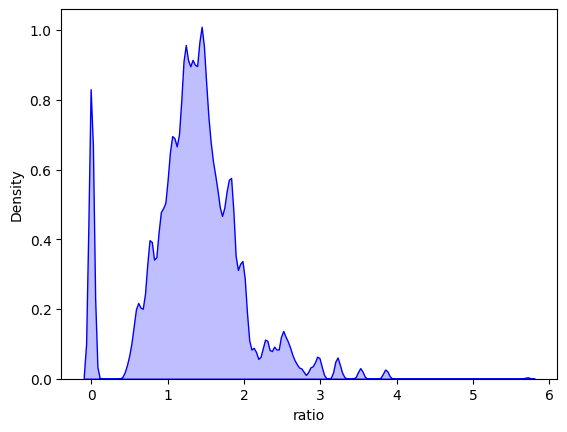

In [288]:
sns.kdeplot(m_k[m_k['target'] == 0]['ratio'], label='Target=0', fill=True, color='blue')

<Axes: xlabel='ratio', ylabel='Count'>

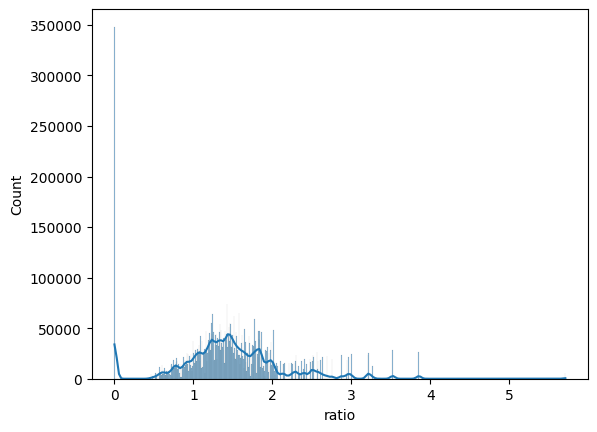

In [298]:
sns.histplot(data=m_k, x="ratio", kde=True)

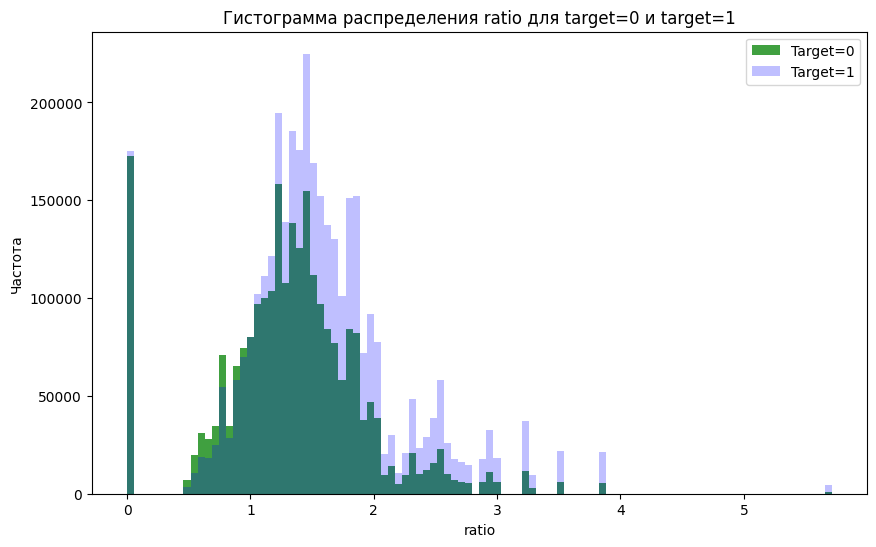

In [309]:
plt.figure(figsize=(10, 6))
plt.hist(m_k[m_k['target'] == 0]['ratio'], bins=100, alpha=0.75, label='Target=0', color='green')
plt.hist(m_k[m_k['target'] == 1]['ratio'], bins=100, alpha=0.25, label='Target=1', color='blue')
plt.title('Гистограмма распределения ratio для target=0 и target=1')
plt.xlabel('ratio')
plt.ylabel('Частота')
plt.legend()
plt.show()